In [1]:
import pymolzilla.processing as pm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend


import locale
locale.setlocale(locale.LC_ALL, 'de_DE.utf8')
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
f = pm.cofe_room_t()
f.df

,set,obj,wavelength,flags,sample_rotation,hext
0,0460,<pymolzilla.processing.file_import.SetRotmld o...,460,None,0,207
1,0530,<pymolzilla.processing.file_import.SetRotmld o...,530,None,0,207
2,0620,<pymolzilla.processing.file_import.SetRotmld o...,620,None,0,207
3,0710,<pymolzilla.processing.file_import.SetRotmld o...,710,None,0,207
4,0810,<pymolzilla.processing.file_import.SetRotmld o...,810,None,0,207
5,0920,<pymolzilla.processing.file_import.SetRotmld o...,920,None,0,207
6,1050,<pymolzilla.processing.file_import.SetRotmld o...,1050,None,0,207
7,1050_L,<pymolzilla.processing.file_import.SetRotmld o...,1050,L,0,50
8,1200,<pymolzilla.processing.file_import.SetRotmld o...,1200,None,0,207
9,1450,<pymolzilla.processing.file_import.SetRotmld o...,1450,None,0,207


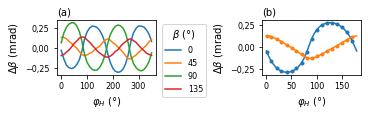

In [26]:
g = f[2]
g.load()

for gg in g:
    gg.preprocess(symmetrize_h = False)


g.collect_merge()

# kresleni
##########

fig, (ax, ax2) = plt.subplots(1,2, figsize=(5,1.5), constrained_layout=True)
phih = g.data['phih']

ax.plot(phih, g.data[0.], color='C0', label='0')
ax.plot(phih, g.data[45.], color='C1', label='45')
ax.plot(phih, g.data[90.], color='C2', label='90')
ax.plot(phih, g.data[135.], color='C3', label='135')

ax.legend(title=r'$\beta$ ($\degree$)', bbox_to_anchor=(1.02,1))
ax.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax.set_ylabel(r'$\Delta\beta$ (mrad)')
ax.text(0, 1.1, "(a)", transform=ax.transAxes)

A = pd.DataFrame({'phih':phih,
                 '0':g.data[0.],
                 '45':g.data[45.],
                 '90':g.data[90.],
                 '135':g.data[135.]})
A.to_csv('out-nemec/5_01/a.csv')

# druhy graf
######
g = f[2]
g.load()
for gg in g:
    gg.preprocess(symmetrize_h = True)
g.collect_merge()
g.fourier2_beta()

g.analyze()

phih = g.data['phih']

ax2.plot(phih, g.data[0.], '.', color='C0', label='0')
ax2.plot(phih, g.data[45.], '.', color='C1', label='45')

B1 = pd.DataFrame({'phih':phih,
                   '0':g.data[0.],
                   '45':g.data[45.]})
B1.to_csv('out-nemec/5_01/b_data.csv')

ax2.set_xlabel(r'$\varphi_H$ ($\degree$)')
ax2.set_ylabel(r'$\Delta\beta$ (mrad)')
ax2.text(0, 1.1, "(b)", transform=ax2.transAxes)


phihdense = np.linspace(0,180,num=50)
phimdense = np.array(g.fit_anisotropy.free_energy.phih2phim(np.radians(phihdense), hext=207))
df = pd.DataFrame({'phih':phihdense,'phim':phimdense})

c2m = np.cos(2*phimdense)
s2m = np.sin(2*phimdense)

ax2.plot(phihdense, g.fit_anisotropy.pmldfit.results[0].params[0]
         +c2m*g.fit_anisotropy.pmldfit.results[0].params[1]
         +s2m*g.fit_anisotropy.pmldfit.results[0].params[2],
         color='C0')
ax2.plot(phihdense, g.fit_anisotropy.pmldfit.results[1].params[0]
         +c2m*g.fit_anisotropy.pmldfit.results[1].params[1]
         +s2m*g.fit_anisotropy.pmldfit.results[1].params[2],
         color='C1')

B2 = pd.DataFrame({'phih':phihdense,
                   '0':g.fit_anisotropy.pmldfit.results[0].params[0]+c2m*g.fit_anisotropy.pmldfit.results[0].params[1]+s2m*g.fit_anisotropy.pmldfit.results[0].params[2],
                   '45':g.fit_anisotropy.pmldfit.results[1].params[0]+c2m*g.fit_anisotropy.pmldfit.results[1].params[1]+s2m*g.fit_anisotropy.pmldfit.results[1].params[2]})
B2.to_csv('out-nemec/5_01/b_fit.csv')

fig.savefig('out/cofert-data.pdf')

In [24]:
g.data

,phih,0.0,45.0
0,0.500,-0.053738,0.124691
1,10.275,-0.164070,0.115006
2,20.385,-0.236748,0.088956
3,29.975,-0.273507,0.059333
4,40.710,-0.287260,0.024222
5,50.260,-0.277242,-0.012142
6,59.985,-0.243808,-0.045119
7,70.235,-0.178767,-0.086084
8,80.240,-0.063280,-0.120665
9,90.275,0.088962,-0.130080
